In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os 
from datetime import datetime
from statsmodels.formula.api import ols
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
plt.style.use("ggplot")

In [22]:
#year = 2003
#month = 12
#day = 31
start_date = (1991,1,1)
end_date = (2004,12,31)

In [23]:
wd = '.\\raw_data'
format = '.csv'
files = [file for file in os.listdir(wd) if format in file]
print(files)

['att.csv', 'bankofamerica.csv', 'chevron.csv', 'coke.csv', 'comcast.csv', 'dow30.csv', 'exxon.csv', 'ford.csv', 'gold.csv', 'honda.csv', 'johnson.csv', 'mcdonald.csv', 'pepsi.csv', 'pg.csv', 'raytheon.csv', 'silver.csv', 'skywest.csv', 'southwest.csv', 'sp500.csv', 'target.csv', 'unitedtech.csv', 'walmart.csv', 'wellsfargo.csv', 'wendys.csv']


In [24]:
df = {}
for file in files:
    cur_market = file[:-4]
    df[cur_market] = pd.read_csv('./raw_data/'+ file)
    df[cur_market]['Date'] = pd.to_datetime(df[cur_market]['Date'])
    df[cur_market] = df[cur_market][['Date','Close']]
    df[cur_market].columns = ['Date',cur_market]

In [25]:
stocklist = list(df.keys())
print(stocklist)

['att', 'bankofamerica', 'chevron', 'coke', 'comcast', 'dow30', 'exxon', 'ford', 'gold', 'honda', 'johnson', 'mcdonald', 'pepsi', 'pg', 'raytheon', 'silver', 'skywest', 'southwest', 'sp500', 'target', 'unitedtech', 'walmart', 'wellsfargo', 'wendys']


In [26]:
# Initiaiting pair dataframe
pair = pd.merge(df[stocklist[0]],df[stocklist[1]],how = 'inner',on = 'Date')

for stock in stocklist[2:]:
    pair = pd.merge(pair,df[stock],how = 'inner',on = 'Date')


In [27]:
pair.head()

,Date,att,bankofamerica,chevron,coke,comcast,dow30,exxon,ford,gold,...,raytheon,silver,skywest,southwest,sp500,target,unitedtech,walmart,wellsfargo,wendys
0,1990-10-01,13.8438,5.4375,18.4063,5.2031,1.1250,2515.84,12.4063,9.9684,396.30,...,16.4688,4.78,1.1250,0.9300,314.94,4.3750,5.531,7.2500,1.8906,1.2296
1,1990-10-04,13.3750,5.2188,18.5000,5.2188,1.0278,2516.83,12.5938,10.2077,395.75,...,16.7188,4.71,1.1667,0.9383,312.69,4.3333,5.609,6.8750,1.8125,1.1934
2,1990-10-05,13.3438,5.1875,18.5000,5.2813,1.0556,2510.64,12.4688,10.4071,395.60,...,16.6875,4.71,1.2500,0.9383,311.50,4.3021,5.813,6.6875,1.8750,1.1934
3,1990-10-08,13.5313,5.0000,18.4063,5.3438,1.0694,2523.76,12.5938,10.4469,390.80,...,16.6250,4.66,1.3333,0.9547,313.48,4.3229,5.859,6.7188,1.8750,1.1573
4,1990-10-09,13.2500,5.0313,18.0625,5.1250,1.0139,2445.54,12.4375,9.8887,397.00,...,16.4375,4.69,1.1250,0.9383,305.10,4.1667,5.688,6.5313,1.8281,1.1211


In [28]:
# Train-test split
train = pair[(pair['Date'] >= datetime(start_date[0],start_date[1],start_date[2])) & (pair['Date'] <= datetime(end_date[0],end_date[1],end_date[2]))].copy()
test = pair[pair['Date'] > datetime(end_date[0],end_date[1],end_date[2])].copy()

In [29]:
train.head()

,Date,att,bankofamerica,chevron,coke,comcast,dow30,exxon,ford,gold,...,raytheon,silver,skywest,southwest,sp500,target,unitedtech,walmart,wellsfargo,wendys
53,1991-01-02,13.9375,5.8125,18.0938,5.6563,1.4167,2610.64,12.6875,8.3735,390.80,...,17.2500,4.16,1.0000,1.1276,326.45,4.7500,5.969,7.5000,2.5469,0.8679
54,1991-01-04,13.5000,5.9063,17.7500,5.6406,1.3750,2566.09,12.8750,8.4532,387.40,...,16.6250,4.21,1.0417,1.1029,321.00,4.7083,5.922,7.4063,2.5469,0.8318
55,1991-01-07,13.2813,5.8125,17.8438,5.5469,1.3472,2522.77,12.7188,8.1343,391.10,...,16.6250,4.20,0.9167,1.0864,315.44,4.6563,5.734,7.2500,2.4375,0.7956
56,1991-01-08,13.1563,5.6250,17.8750,5.5000,1.2639,2509.41,12.6875,8.1343,389.70,...,16.8438,4.25,0.8750,1.1523,314.90,4.5938,5.625,7.2813,2.4531,0.7956
57,1991-01-10,13.1563,5.4375,17.8125,5.4688,1.2639,2498.76,12.5938,8.1741,390.55,...,16.8125,4.13,0.8750,1.1605,314.53,4.5729,5.500,7.2500,2.4531,0.7956


In [30]:
coint_mat = np.zeros((len(stocklist),len(stocklist)))

In [31]:
pair_info = []
for i in range(len(stocklist[:-1])):
    for stock in stocklist[i+1:]:
        # get adtest1
        stock_y = stock
        stock_x = stocklist[i]
        formula1 = stock_y + '~' + stock_x
        model = ols(formula = formula1, data = train)
        result = model.fit()
        train['b_stock'] = result.params[1] * train[stock_x]
        train['diff'] = train[stock_y] - train['b_stock']
        adtest1 = adfuller(train['diff'])[1]
        
        #get adtest2
        stock_y, stock_x = stock_x, stock_y
        formula2 = stock_y + '~' + stock_x
        model = ols(formula = formula2, data = train)
        result = model.fit()
        train['b_stock'] = result.params[1] * train[stock_x]
        train['diff'] = train[stock_y] - train['b_stock']
        adtest2 = adfuller(train['diff'])[1]
        
        # assign adtest1 and adtest2 accordingly
        coint_mat[i,stocklist.index(stock)] = adtest2
        coint_mat[stocklist.index(stock),i] = adtest1
        pair_tuple1 = (formula1,adtest1)
        pair_tuple2 = (formula2,adtest2)
        
        # append only pair order with lowest p-value
        if adtest1 <= adtest2:
            pair_info.append(pair_tuple1)
        else:
            pair_info.append(pair_tuple2)
        
        #coint_mat[i,stocklist.index(stock)] = adtest2
        #coint_mat[stocklist.index(stock),i] = adtest2
        #pair_tuple = (formula2,adtest2)
        #pair_info.append(pair_tuple)

In [32]:
coint_mat

array([[0.00000000e+00, 7.21898617e-01, 8.41977302e-01, 3.98528885e-01,
        6.41819500e-01, 7.10608758e-01, 9.09329154e-01, 6.90429173e-02,
        2.84305199e-01, 6.37467711e-01, 7.40921992e-01, 1.82638333e-02,
        8.39852577e-01, 7.14804175e-01, 3.33245707e-01, 6.89198516e-01,
        5.79047716e-01, 6.75783199e-01, 6.35824638e-01, 7.65104329e-01,
        8.18743762e-01, 6.48347977e-01, 7.98676974e-01, 7.42398400e-01],
       [8.41489849e-01, 0.00000000e+00, 8.61888463e-02, 9.59665435e-01,
        4.93457772e-01, 3.92851965e-01, 5.36627106e-02, 9.35088682e-01,
        8.77132983e-01, 3.30861686e-02, 1.15551471e-01, 7.31374934e-01,
        3.89433582e-02, 1.20724461e-03, 8.34895548e-01, 1.70914384e-01,
        5.97745076e-01, 2.50127647e-01, 4.11462579e-01, 2.25525605e-01,
        5.74604791e-02, 4.68414082e-01, 3.88656844e-02, 2.25557394e-01],
       [8.76724728e-01, 1.29115308e-01, 0.00000000e+00, 8.28470766e-01,
        3.13741887e-01, 1.56839878e-02, 2.28829166e-02, 9.6942

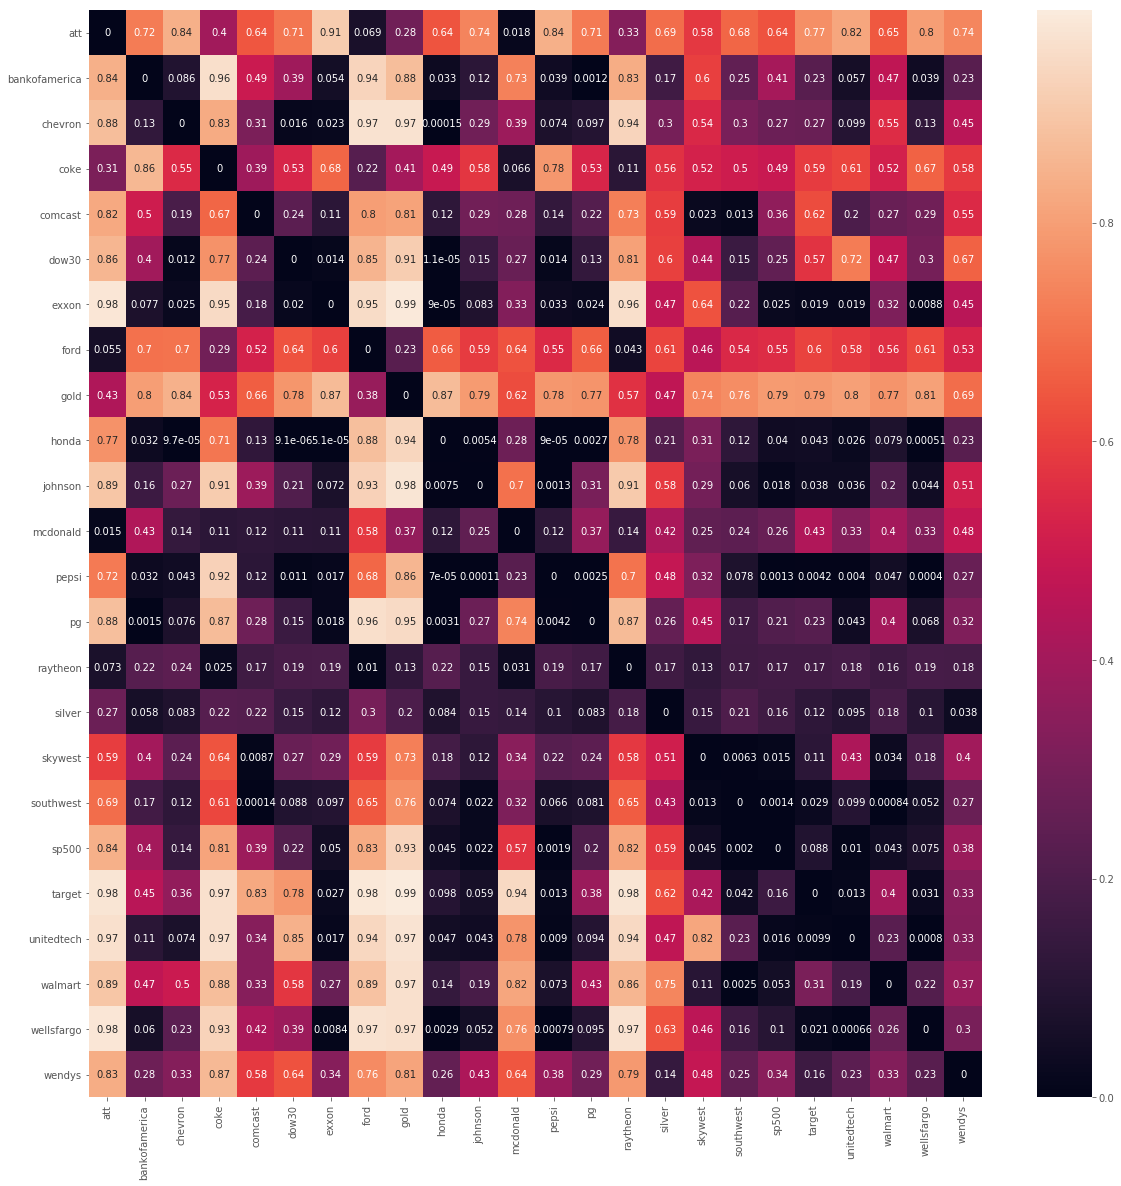

In [33]:
fig, ax = plt.subplots(figsize=(20,20))
sns_heatmap = sns.heatmap(coint_mat, annot = True, xticklabels = stocklist, yticklabels = stocklist, ax = ax)
#sns_heatmap.get_figure().savefig("cointegration_matrix.png")
sns_heatmap

In [34]:
# Filter out high co-integrated companies

In [35]:
threshold = 0.2
filtered_pair = list(filter(lambda x:x[1] <= threshold, pair_info))
filtered_pair

[('ford~att', 0.055440044063090554),
 ('mcdonald~att', 0.014799089931556006),
 ('raytheon~att', 0.07342320451473394),
 ('bankofamerica~chevron', 0.08618884625487844),
 ('bankofamerica~exxon', 0.053662710585606954),
 ('honda~bankofamerica', 0.03221243446664859),
 ('bankofamerica~johnson', 0.11555147073397515),
 ('pepsi~bankofamerica', 0.03172997537892083),
 ('bankofamerica~pg', 0.0012072446063373687),
 ('silver~bankofamerica', 0.05839802303289792),
 ('southwest~bankofamerica', 0.1710839944341379),
 ('bankofamerica~unitedtech', 0.05746047905587842),
 ('bankofamerica~wellsfargo', 0.03886568443653127),
 ('comcast~chevron', 0.19141121940691314),
 ('dow30~chevron', 0.012430928364910193),
 ('chevron~exxon', 0.022882916616766533),
 ('honda~chevron', 9.686289289099097e-05),
 ('mcdonald~chevron', 0.13964388635844394),
 ('pepsi~chevron', 0.043450594192831045),
 ('pg~chevron', 0.0760226340728353),
 ('silver~chevron', 0.08258324617260754),
 ('southwest~chevron', 0.1213854249219854),
 ('sp500~chevro

In [36]:
filtered_pair_df = pd.DataFrame(filtered_pair, columns = ['pair','p-value'])
filtered_pair_df.sort_values(by = 'p-value', ascending = True, inplace = True)

In [37]:
filtered_pair_df

# filtered_pair_df.info()

,pair,p-value
35,honda~dow30,0.000009
43,honda~exxon,0.000051
60,pepsi~honda,0.000070
16,honda~chevron,0.000097
70,pepsi~johnson,0.000108
33,southwest~comcast,0.000136
91,pepsi~wellsfargo,0.000401
69,honda~wellsfargo,0.000508
131,wellsfargo~unitedtech,0.000658
121,southwest~walmart,0.000840
